<img src="./logo_UTN.svg" align="right" width="150" /> 

#### TP-Semanal 1

### Circuito

Dado el siguiente circuito:

<img src="./image.png">

### Transferencia

1. Obtener la función transferencia V2/V1 ( módulo , fase y diagrama de polos y ceros).

Aplicando Norton:

\begin{equation}
\begin{gathered}
V^{+}\left(G_3+S C_1\right)-V_1 S C_1=0 \\
V^{-}\left(G_2+G_1\right)-V_1 G_1-V_0 G_2=0
\end{gathered}
\end{equation}

Asumiendo el OPAMP ideal y reordenando:

\begin{equation}
\begin{gathered}
V^{+}=\frac{V_1 S C_1}{G_3+S C_1}=V^{-}=\frac{V_1 G_1+V_0 G_2}{G_2+G_1} \\
\frac{V_0}{V_i}=\frac{S-\frac{G_1}{G_2} \cdot \frac{G_3}{C}}{S+\frac{G_3}{C}}=\frac{S}{S+\frac{G_3}{C}}-\frac{G_1}{G_2} \cdot \frac{\frac{G_3}{C}}{S+\frac{G_3}{C}}
\end{gathered}
\end{equation}

Renombrando lo siguiente y proponiendolo como una suma de transferencias:

\begin{equation}
\begin{gathered}
w_t=\frac{G_3}{C} \\
K=\frac{G_1}{G_2} \\
\frac{V_0}{V_i}=\frac{S}{S+w_t}-K \cdot \frac{w_t}{S+w_t}
\end{gathered}
\end{equation}

### Normalizacion

2. Proponga una norma de impedancia y frecuencia de forma tal de llegar a una transferencia normalizada.

\begin{equation}
\begin{gathered}
\$=\frac{S}{w_t} \\
\frac{V_0}{V_i}=\frac{\$}{\$+1}-K \cdot \frac{1}{\$+1}
\end{gathered}
\end{equation}

Se obtiene la impedancia:

\begin{equation}
\begin{gathered}
I_1=I_a-I_b=V^{+}\left(G_3-G_1\right)+V_1 G_1 \\
V^{+}=\frac{V_1 S C}{G_3+S C} \\
Z=\frac{1}{G_3} \frac{S C+G_3}{S C+G_1}
\end{gathered}
\end{equation}

### Simulacion con Python

3. Simule la función transferencia normalizada en Python.

Se simulara con valores de K = 1


(2, <Axes: xlabel='$\\sigma$', ylabel='j$\\omega$'>)

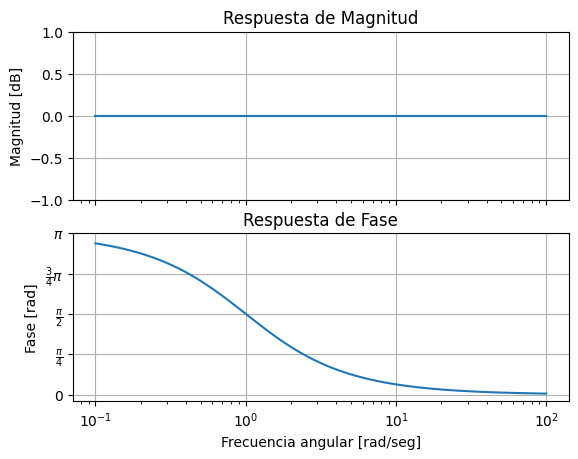

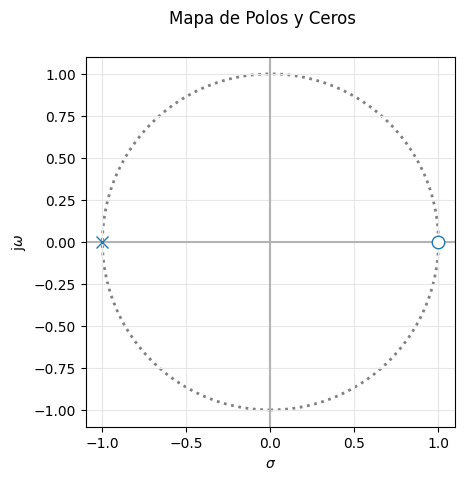

In [1]:
import numpy as np
from scipy import signal as sig
from matplotlib import pyplot as plt

from pytc2.sistemas_lineales import bodePlot, pzmap, GroupDelay, analyze_sys

plt.figure(1)
plt.close(1)

num = np.array([ 1, -1])
den = np.array([ 1, 1])

H1 = sig.TransferFunction( num, den )

fig1, axs = bodePlot(H1)  # Obtener la figura y las subtramas

axs[0].set_ylim(-1, 1)  # Establecer límites del eje y en la subtrama 0

pzmap(H1)


In [2]:
import sympy as sp
from IPython.display import display, Math
from pytc2.general import print_subtitle

V, Vi, Vo, G1, G2, G3, S, C1 = sp.symbols('V Vi Vo G1 G2 G3 S C1')

eq1 = V*(G3 + S*C1) - Vi*S*C1
eq2 = V*(G2 + G1) - Vi*G1 - Vo*G2

def get_Transfer(equations, V):

    sol = sp.solve(equations, V)
    T = sol[Vo]/sol[Vi]
    num, den = sp.fraction(T)
    coeficiente_mayor_grado = sp.Poly(den, S).all_coeffs()[0]

    num = sp.simplify(num/coeficiente_mayor_grado)
    den = sp.simplify(den/coeficiente_mayor_grado)

    return num/den

display(Math( r' \frac{V_o}{V_i} = ' + sp.latex(get_Transfer((eq1, eq2), (Vo, Vi, V)))))

<IPython.core.display.Math object>

### Simulacion

4. Simule la red normaliza en LTspice, y obtenga su respuesta en frecuencia

<img src="./image1.png">

5. ¿Qué tipo de filtro es? ¿Qué utilidad podría tener este tipo de circuitos?

Es un filtro pasa todo que para señales de baja frecuencia le cambia la fase.

